<h1 class='Introduction'> Introduction </h1>
<p>This Project aims to detect the number png files which is established under python 3.6</p>
<p> Data set: MNIST</p>
<p> Method: DNN</p>

<h1 class = 'package'> Package </h1>

In [80]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

print(tf.__version__)

2.9.1


<h1 class = 'load_data'>Load Data</h1>

In [22]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [53]:
# One Hot Encoding
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

In [23]:
# Check the number of train and test data
print('The length of training data is:', len(X_train))
print('The length of testing data is:', len(X_test))

The length of training data is: 60000
The length of testing data is: 10000


In [26]:
# Check the size of trainning data
print('The size of training data is:', X_train.shape)
print('The size of testing data is:', X_test.shape)

The size of training data is: (60000, 28, 28)
The size of testing data is: (10000, 28, 28)


In [27]:
# Visualize the training data by plt
def plot_img(img):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(img,cmap='binary') # binary: black and white img
    plt.show()

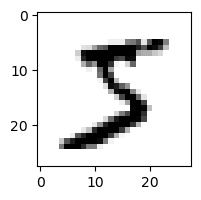

The answer is  5


In [28]:
plot_img(X_train[0])
print('The answer is ',y_train[0])

<h1 class ='DNN'> DNN </h1>

In [30]:
X_train, X_test = X_train.reshape(len(X_train),-1)/255.0, X_test.reshape(len(X_test),-1)/255.0

<h1 class='model_estibalishment'> Model Estibalishment </h1> 

In [48]:
def build_model():
    model = Sequential()
    model.add(Dense(units=25, activation=Activation('relu'),input_dim = X_train.shape[-1]))
    model.add(Dense(units=10, activation=Activation('softmax')))
    return model

In [50]:
model = build_model()
model.summary()
#(784+1) * 25+(25+1)*10

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                19625     
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


<h1 class = 'compile_model'> Compile and Train the Model </h1>

In [54]:
# compile 
optim = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optim,
              metrics = ['acc'])

# Train
history = model.fit(X_train, y_train_one_hot,
                   batch_size=64,
                   epochs=25,
                   verbose=1,
                   shuffle=True,
                   validation_split=0.1)

/Users/chenliheng/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
844/844 [==============================] - 1s 699us/step - loss: 0.3087 - acc: 0.9076 - val_loss: 0.1808 - val_acc: 0.9473
Epoch 2/25
844/844 [==============================] - 0s 587us/step - loss: 0.1864 - acc: 0.9445 - val_loss: 0.1763 - val_acc: 0.9498
Epoch 3/25
844/844 [==============================] - 1s 592us/step - loss: 0.1677 - acc: 0.9514 - val_loss: 0.1715 - val_acc: 0.9527
Epoch 4/25
844/844 [==============================] - 0s 588us/step - loss: 0.1531 - acc: 0.9548 - val_loss: 0.1641 - val_acc: 0.9577
Epoch 5/25
844/844 [==============================] - 0s 587us/step - loss: 0.1417 - acc: 0.9591 - val_loss: 0.1553 - val_acc: 0.9613
Epoch 6/25
844/844 [==============================] - 1s 595us/step - loss: 0.1375 - acc: 0.9591 - val_loss: 0.2075 - val_acc: 0.9485
Epoch 7/25
844/844 [==============================] - 0s 587us/step - loss: 0.1328 - acc: 0.9606 - val_loss: 0.1685 - val_acc: 0.9547
Epoch 8/25
844/844 [==============================] - 1s 600us

<h1 class='result'> Result </h1>

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [60]:
acc, loss, val_loss, val_acc = history_dict['acc'], history_dict['loss'], history_dict['val_loss'], history_dict['val_acc']
epoches_ = range(1, len(acc)+1)

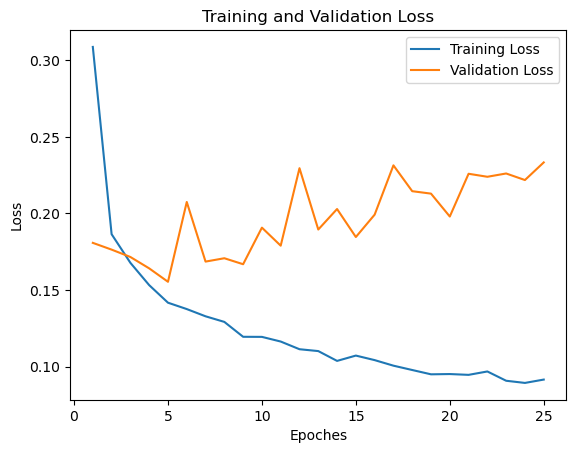

In [68]:
plt.plot(epoches_, loss, label ='Training Loss')
plt.plot(epoches_, val_loss, label ='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

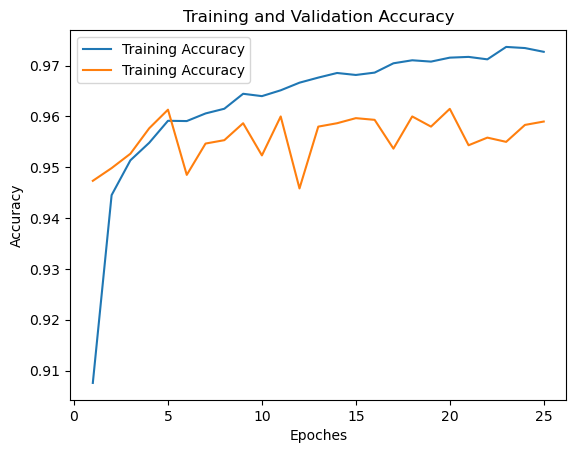

In [69]:
plt.clf()
plt.plot(epoches_, acc, label = 'Training Accuracy')
plt.plot(epoches_, val_acc, label = 'Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h1 class= 'prediction'> Prediction </h1>

In [72]:
np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 0s 346us/step


array([7, 2, 1, ..., 4, 5, 6])

In [81]:
y_pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 0s 336us/step


In [83]:
acc_test = accuracy_score(y_pred,y_test)

<h1 class = 'outcome_plot'> Discussion </h1>

In [106]:
i = 0
correct =[]
wrong = []

for k in range(len(y_pred)):
    if (y_pred[k] == y_test[k]) and (i < 8):
        correct.append(k)
        i += 1
    else:
        break
    
i = 0    
for k in range(len(y_pred)):
    if (y_pred[k] != y_test[k]) and (i < 8):
        wrong.append(k)
        i += 1
    else:
        continue
        

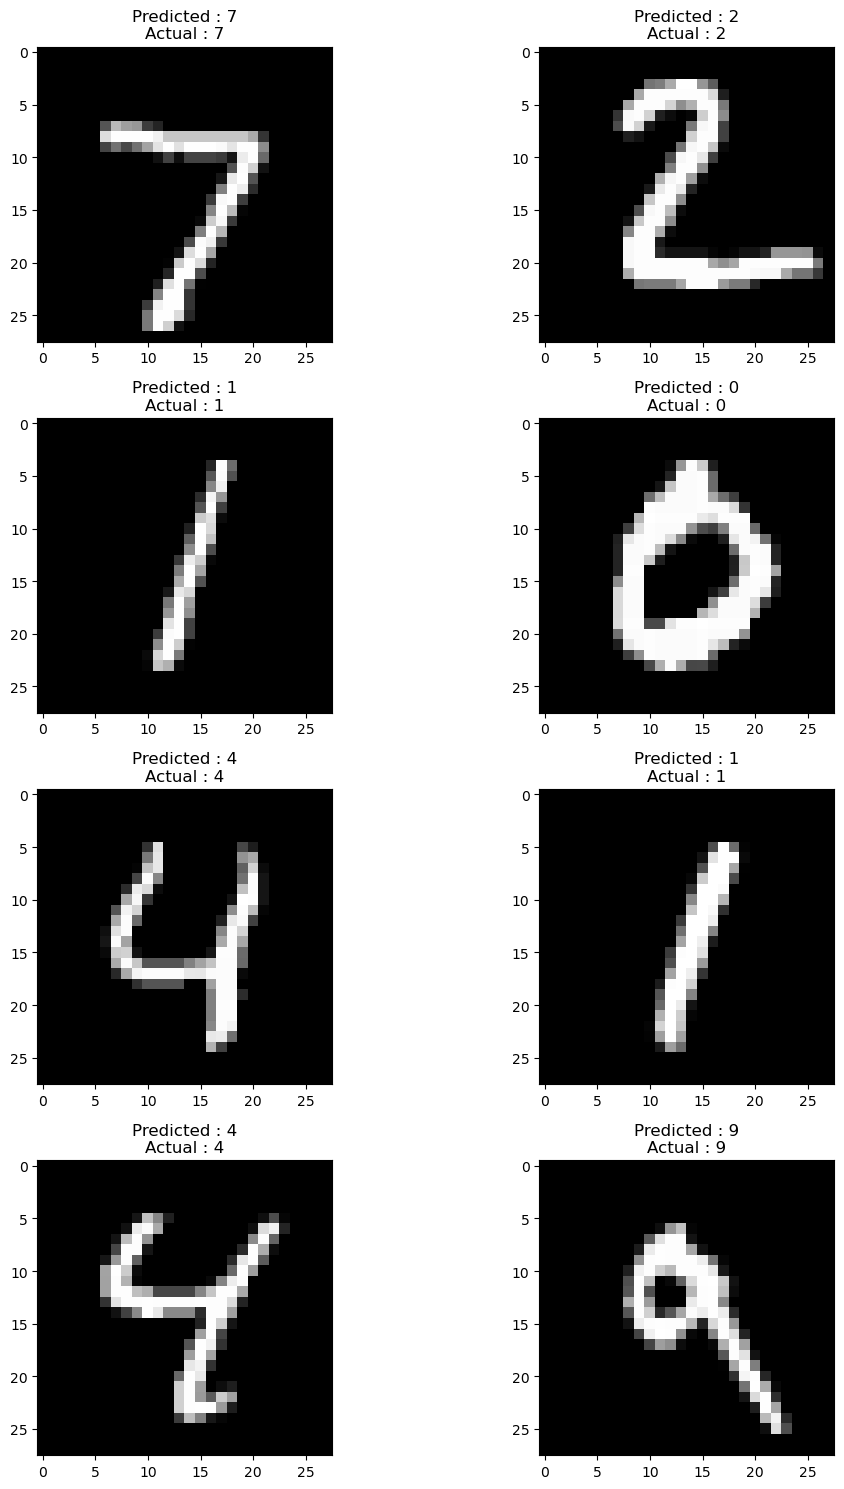

In [109]:
# Correct 
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[correct[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(y_pred[correct[count]])+"\n"+"Actual : "+str(y_test[correct[count]]))
        plt.tight_layout()
        count+=1

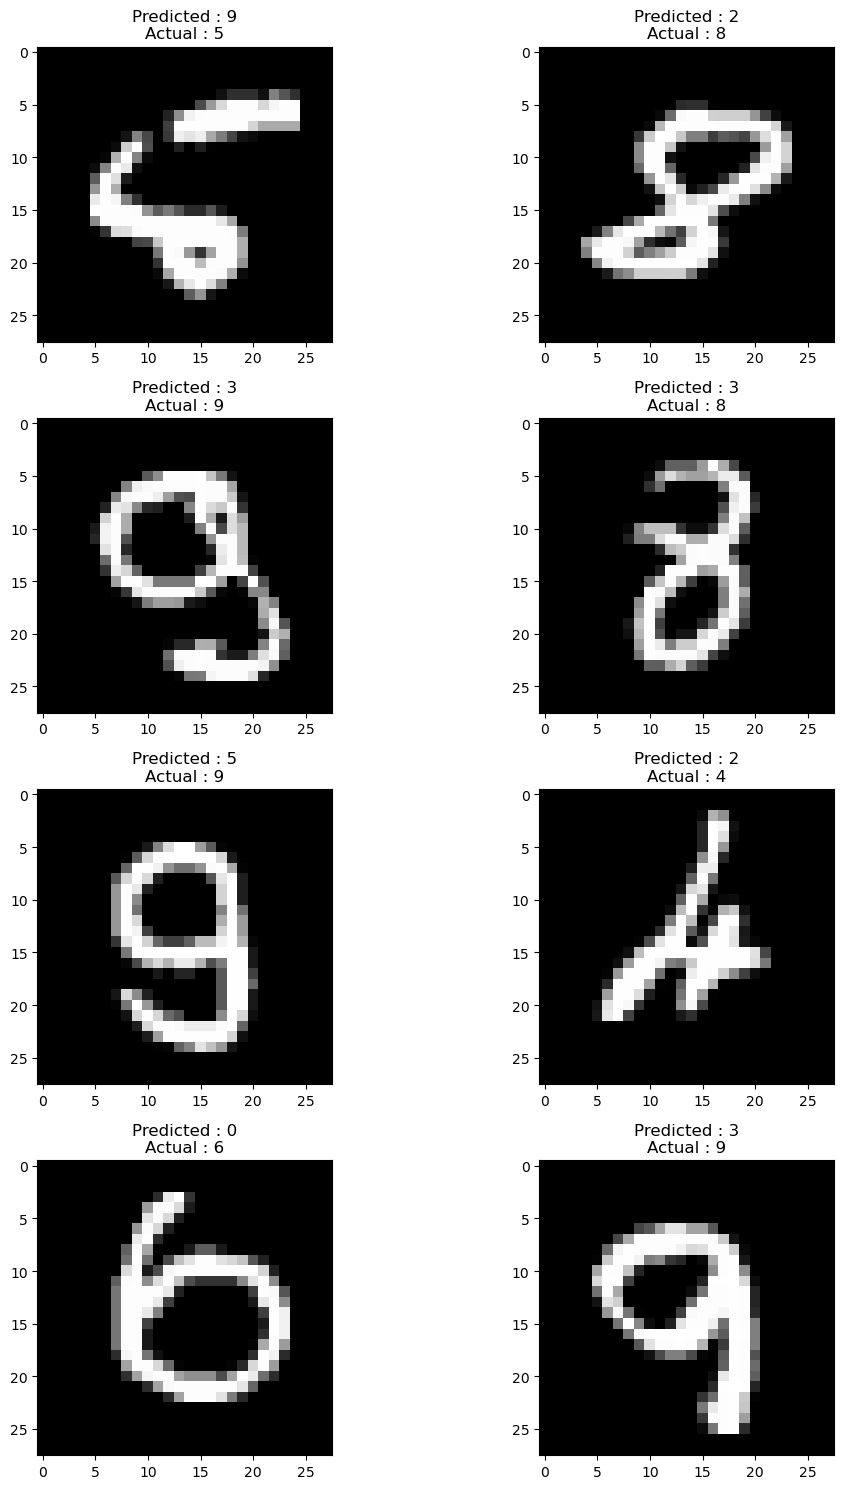

In [113]:
# Wrong
count = 0
fig, ax = plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range(4):
    for j in range(2):
        ax[i,j].imshow(X_test[wrong[count]].reshape(28,28),cmap='gray')
        ax[i,j].set_title("Predicted : "+str(y_pred[wrong[count]])+"\n"+"Actual : "+str(y_test[wrong[count]]))
        plt.tight_layout()
        count += 1

<p> Numbes like 3, 6, 9 are more likely misclassified by model.</p>
<p> It may be caused by the hook of words and the classifier has trobule in detecting them.</p>